In [107]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [108]:
per_values = [round(0.0001 * i, 4) for i in range(0,40,2)]
metric = [[] for _ in range(5)]
x = 1
for y in per_values:
    # print(y)
    filename = './metrics/met_{}_{}_.txt'.format(x, y)
    # print(filename)
    if not os.path.exists(filename):
        continue
    with open(filename, 'r') as file:
        content = file.readlines()
        i = 0
        for line in content:
            float_percentage = float(line.split(":")[1].strip().strip('%')) / 100
            # print(float_percentage)
            metric[i].append(float_percentage)
            i += 1
fpr1 = np.array(metric[0])
auroc1 = np.array(metric[2])


In [109]:
temp_values = list(range(1, 21))
y = 0.0
metric = [[] for _ in range(5)]
for x in temp_values:
    filename = './metrics/met_{}_{}_.txt'.format(x, y)
    # print(filename)
    if not os.path.exists(filename):
        continue
    with open(filename, 'r') as file:
        content = file.readlines()
        i = 0
        for line in content:
            float_percentage = float(line.split(":")[1].strip().strip('%')) / 100
            # print(float_percentage)
            metric[i].append(float_percentage)
            i += 1
fpr2 = np.array(metric[0])
auroc2 = np.array(metric[2])

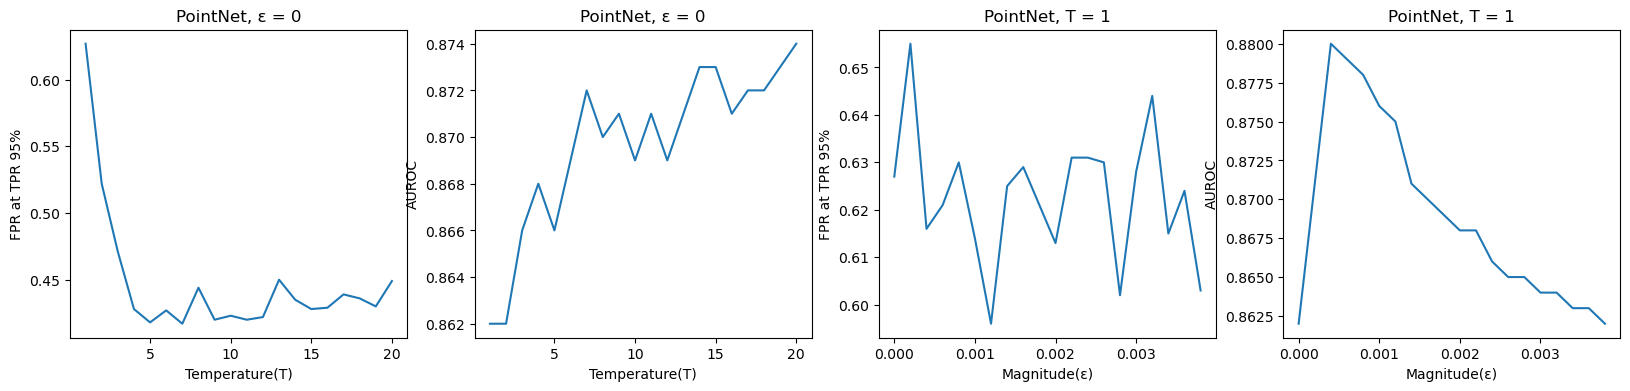

In [110]:
epsilon = chr(0x03B5)
fig, plots = plt.subplots(nrows=1, ncols=4, figsize=(20,4))
plots[0].plot(temp_values,fpr2)
plots[0].set_ylabel('FPR at TPR 95%')
plots[0].set_xlabel('Temperature(T)')
title = "PointNet, {} = 0".format(epsilon)
plots[0].set_title(title)
plots[1].set_title(title)
plots[1].plot(temp_values,auroc1)
plots[1].set_xlabel('Temperature(T)')
plots[1].set_ylabel('AUROC')

plots[2].plot(per_values,fpr1)
title = "PointNet, T = 1"
xl = 'Magnitude({})'.format(epsilon)
plots[2].set_ylabel('FPR at TPR 95%')
plots[2].set_xlabel(xl)
plots[2].set_title(title)
plots[3].set_title(title)
plots[3].plot(per_values,auroc2)
plots[3].set_xlabel(xl)
plots[3].set_ylabel('AUROC')
plt.show()

In [111]:
temp_values = list(range(1, 21))
y = 0.0
metric = [[] for _ in range(5)]
for x in temp_values:
    filename = './metrics/met_{}_{}_v.txt'.format(x, y)
    # print(filename)
    if not os.path.exists(filename):
        continue
    with open(filename, 'r') as file:
        content = file.readlines()
        i = 0
        for line in content:
            float_percentage = float(line.split(":")[1].strip().strip('%')) / 100
            # print(float_percentage)
            metric[i].append(float_percentage)
            i += 1
fpr_v = np.array(metric[0])
auroc_v = np.array(metric[2])

Text(0, 0.5, 'AUROC')

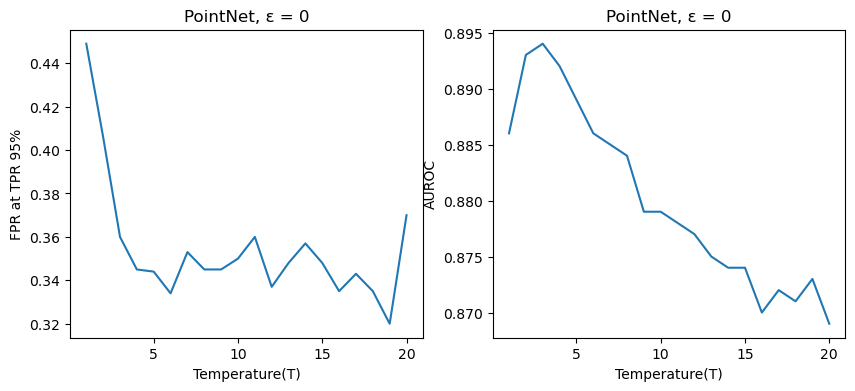

In [112]:
fig, plots = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plots[0].plot(temp_values,fpr_v)
plots[0].set_ylabel('FPR at TPR 95%')
plots[0].set_xlabel('Temperature(T)')
title = "PointNet, {} = 0".format(epsilon)
plots[0].set_title(title)
plots[1].set_title(title)
plots[1].plot(temp_values,auroc_v)
plots[1].set_xlabel('Temperature(T)')
plots[1].set_ylabel('AUROC')

In [133]:
met_names = ["fpr ↓", "error ↓", "auc ↑", "auprin ↑", "auprout ↑"]
base_met = [0] * 5
base_filename = './metrics/met_1_0.0_v.txt'
with open(base_filename, 'r') as file:
    content = file.readlines()
    i = 0
    for line in content:
        float_percentage = float(line.split(":")[1].strip().strip('%')) / 100
        # print(float_percentage)
        base_met[i] = (float_percentage)
        i += 1
best_met = [0] * 5
best_filename = './metrics/met_20_0.0_v.txt'
with open(best_filename, 'r') as file:
    content = file.readlines()
    i = 0
    for line in content:
        float_percentage = float(line.split(":")[1].strip().strip('%')) / 100
        # print(float_percentage)
        best_met[i] = (float_percentage)
        i += 1
def color_difference(val): 
    if val > 0: 
        color = 'green'
    elif val < 0: 
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color 
o_df = pd.DataFrame(np.array(best_met)).rename(columns={0:"Our"})
b_df = pd.DataFrame(np.array(base_met)).rename(columns={0:"Baseline"})
m_df = pd.concat([ o_df, b_df], axis = 1)
m_df["Different (Our - Baseline) / Base Line"] = round((m_df["Our"] - m_df["Baseline"]) / m_df["Baseline"] * 100, 2)
m_df.insert(loc=0, column='Labels', value=["fpr ↓", "error ↓", "auc ↑", "auprin ↑", "auprout ↑"])
print(m_df)


      Labels    Our  Baseline  Different (Our - Baseline) / Base Line
0      fpr ↓  0.370     0.449                                  -17.59
1    error ↓  0.165     0.185                                  -10.81
2      auc ↑  0.869     0.886                                   -1.92
3   auprin ↑  0.816     0.870                                   -6.21
4  auprout ↑  0.901     0.886                                    1.69
